<a href="https://colab.research.google.com/github/yixinzh-um/Earthquake_Damage_Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/Shared drives/Team 1 earthquake'

/content/drive/Shared drives/Team 1 earthquake


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv("train_values.csv")
df_train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,1020144,10,804,1371,2,5,7,6,t,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,199685,25,211,5071,2,25,9,4,n,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,1038433,22,816,12104,2,10,5,4,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,461920,6,449,3741,1,10,8,3,t,r,q,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,957027,20,254,5266,2,10,10,6,n,w,q,f,q,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_damage=pd.read_csv("train_labels.csv")
df_damage.head()

,building_id,damage_grade
0,1020144,2
1,199685,2
2,1038433,2
3,461920,2
4,957027,3


In [ ]:
df= pd.merge(df_train,df_damage, on='building_id',how='left')
df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,1020144,10,804,1371,2,5,7,6,t,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
1,199685,25,211,5071,2,25,9,4,n,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,1038433,22,816,12104,2,10,5,4,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
3,461920,6,449,3741,1,10,8,3,t,r,q,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,957027,20,254,5266,2,10,10,6,n,w,q,f,q,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208475,788768,22,165,10190,2,30,5,4,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,1
208476,490379,27,269,5197,3,80,5,6,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0,2
208477,294228,26,1259,10829,1,10,4,6,t,r,n,f,j,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
208478,464117,7,258,1869,1,15,6,3,t,r,q,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

# visualization 1


In [ ]:
df_count_floors= df.groupby('count_floors_pre_eq')[['count_floors_pre_eq','damage_grade']].mean()
df_count_floors

,count_floors_pre_eq,damage_grade
count_floors_pre_eq,,
1,1.0,2.042746
2,2.0,2.239797
3,3.0,2.395904
4,4.0,2.115287
5,5.0,2.116071
6,6.0,1.823171
7,7.0,1.848485
8,8.0,2.000000


In [ ]:
for

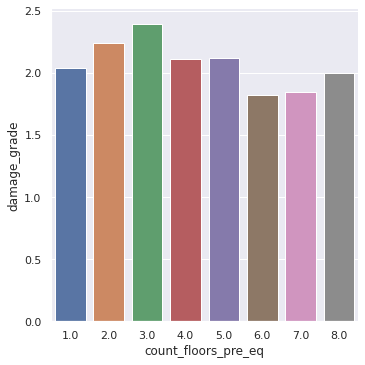

In [ ]:
sns.catplot(data=df_count_floors, y='damage_grade',x='count_floors_pre_eq',kind='bar')

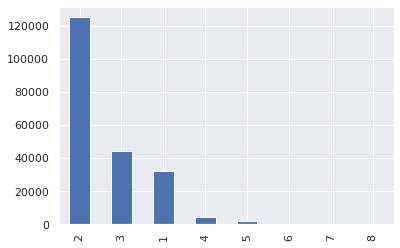

In [ ]:
df['count_floors_pre_eq'].value_counts().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f738b46a0>,
      dtype=object)

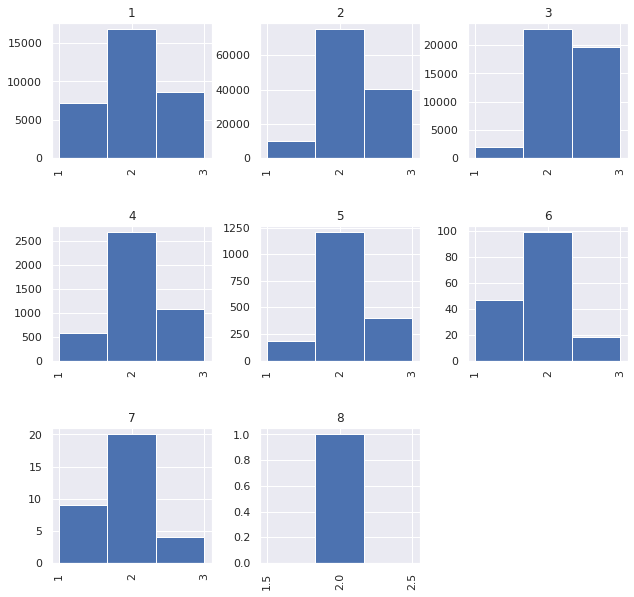

In [ ]:
df['damage_grade'].hist(by=df['count_floors_pre_eq'],figsize=(10,10),bins=3)

In [ ]:
lst=["has_secondary_use_agriculture","has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry","has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"]
df_s=df[lst]
df_a=df_s[df_s==1].stack().reset_index().set_index('level_0')
df['secondary_use']=df_a[~df_a.index.duplicated(keep='first')]['level_1']
df['secondary_use'].fillna(value='no_secondary_use',inplace=True)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,superstructure,secondary_use
0,1020144,10,804,1371,2,5,7,6,t,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,no_superstructure,no_secondary_use
1,199685,25,211,5071,2,25,9,4,n,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,no_superstructure,no_secondary_use
2,1038433,22,816,12104,2,10,5,4,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,no_superstructure,no_secondary_use
3,461920,6,449,3741,1,10,8,3,t,r,q,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,no_superstructure,no_secondary_use
4,957027,20,254,5266,2,10,10,6,n,w,q,f,q,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,3,no_superstructure,has_secondary_use_agriculture


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f614c0198>,
      dtype=object)

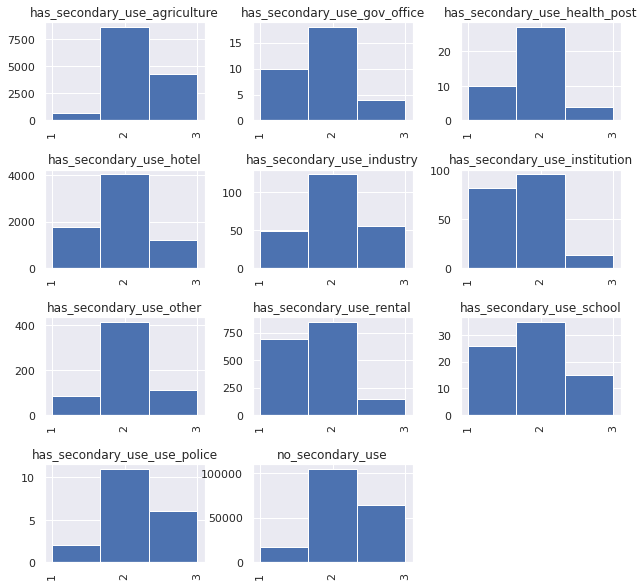

In [ ]:
df['damage_grade'].hist(by=df['secondary_use'],figsize=(10,10),bins=3)

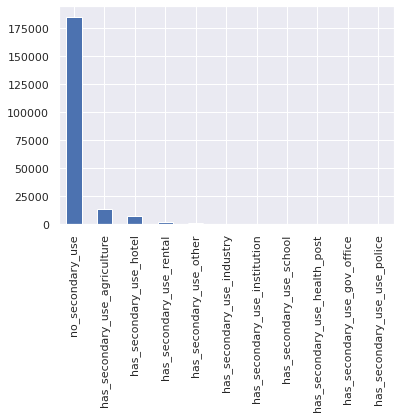

In [ ]:
df['secondary_use'].value_counts().plot.bar()

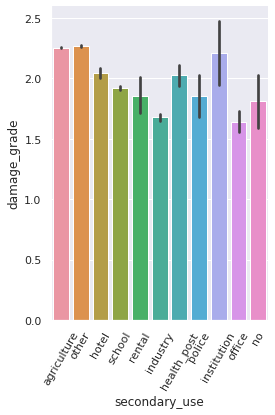

In [ ]:
chart=sns.catplot(data=df, y='damage_grade',x='secondary_use',kind='bar')
chart.set_xticklabels(labels=['agriculture','other','hotel','school','rental','industry','health_post','police','institution','office','no'],rotation=60)

In [ ]:
lst=["has_superstructure_adobe_mud","has_superstructure_mud_mortar_stone","has_superstructure_stone_flag","has_superstructure_cement_mortar_stone","has_superstructure_mud_mortar_brick","has_superstructure_cement_mortar_brick","has_superstructure_timber","has_superstructure_bamboo","has_superstructure_rc_non_engineered","has_superstructure_rc_engineered","has_superstructure_other"]
df_s=df[lst]
df_a=df_s[df_s==1].stack().reset_index().set_index('level_0')
df['superstructure']=df_a[~df_a.index.duplicated(keep='first')]['level_1']
df['superstructure'].fillna(value='no_superstructure',inplace=True)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,superstructure,secondary_use
0,1020144,10,804,1371,2,5,7,6,t,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,has_superstructure_mud_mortar_stone,no_secondary_use
1,199685,25,211,5071,2,25,9,4,n,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,has_superstructure_mud_mortar_stone,no_secondary_use
2,1038433,22,816,12104,2,10,5,4,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,has_superstructure_mud_mortar_stone,no_secondary_use
3,461920,6,449,3741,1,10,8,3,t,r,q,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2,has_superstructure_mud_mortar_stone,no_secondary_use
4,957027,20,254,5266,2,10,10,6,n,w,q,f,q,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0,3,has_superstructure_mud_mortar_stone,has_secondary_use_agriculture


In [ ]:
df_a[df_a.index.duplicated(keep=False)]

,level_1,0
level_0,,
4,has_superstructure_mud_mortar_stone,1.0
4,has_superstructure_timber,1.0
4,has_superstructure_bamboo,1.0
7,has_superstructure_stone_flag,1.0
7,has_superstructure_timber,1.0
...,...,...
208473,has_superstructure_timber,1.0
208475,has_superstructure_mud_mortar_stone,1.0
208475,has_superstructure_timber,1.0


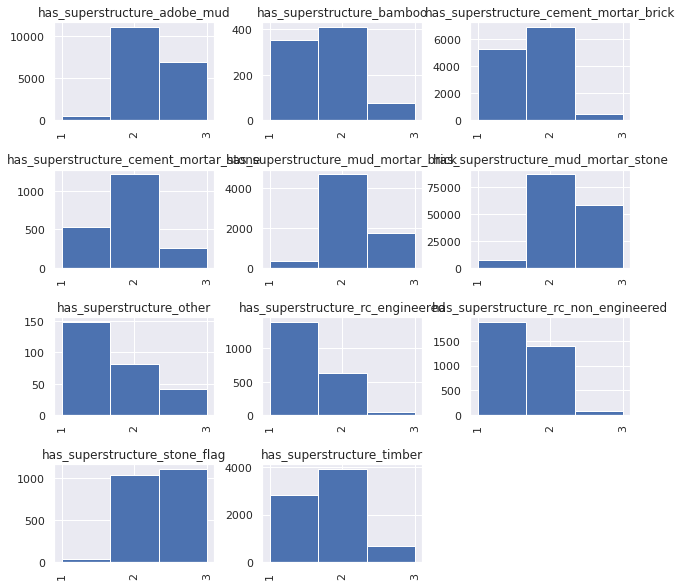

In [ ]:
chart=df['damage_grade'].hist(by=df['superstructure'],figsize=(10,10),bins=3)


In [ ]:
df.loc[208479]

building_id                                                            652585
geo_level_1_id                                                             26
geo_level_2_id                                                            366
geo_level_3_id                                                           2116
count_floors_pre_eq                                                         2
age                                                                        20
area_percentage                                                             8
height_percentage                                                           5
land_surface_condition                                                      o
foundation_type                                                             r
roof_type                                                                   n
ground_floor_type                                                           f
other_floor_type                                                

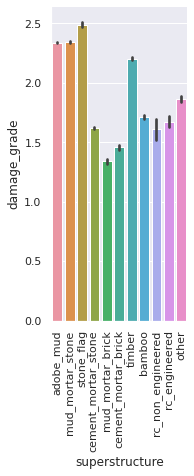

In [ ]:
chart=sns.catplot(data=df, y='damage_grade',x='superstructure',kind='bar')

chart.set_xticklabels(rotation=90,labels=["adobe_mud","mud_mortar_stone","stone_flag","cement_mortar_stone","mud_mortar_brick","cement_mortar_brick","timber","bamboo","rc_non_engineered","rc_engineered","other"])

[Text(0, 0, 'adobe_mud'),
 Text(0, 0, 'mud_mortar_stone'),
 Text(0, 0, 'stone_flag'),
 Text(0, 0, 'cement_mortar_stone'),
 Text(0, 0, 'mud_mortar_brick'),
 Text(0, 0, 'cement_mortar_brick'),
 Text(0, 0, 'timber'),
 Text(0, 0, 'bamboo'),
 Text(0, 0, 'rc_non_engineered'),
 Text(0, 0, 'rc_engineered'),
 Text(0, 0, 'other')]

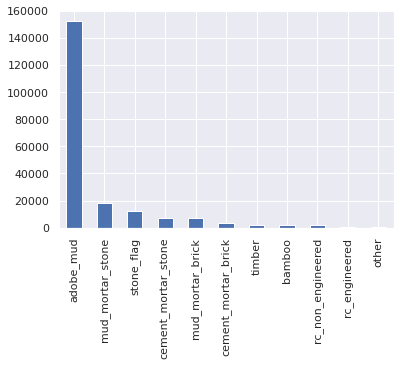

In [ ]:
chart=df['superstructure'].value_counts().plot.bar()
chart.set_xticklabels(labels=["adobe_mud","mud_mortar_stone","stone_flag","cement_mortar_stone","mud_mortar_brick","cement_mortar_brick","timber","bamboo","rc_non_engineered","rc_engineered","other"])

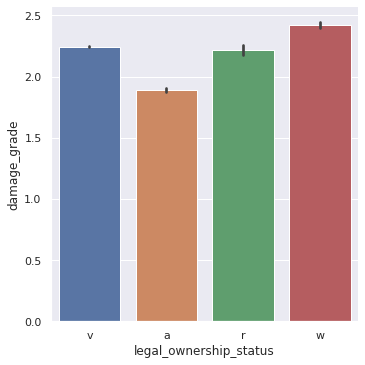

In [ ]:
chart=sns.catplot(data=df, y='damage_grade',x='legal_ownership_status',kind='bar')

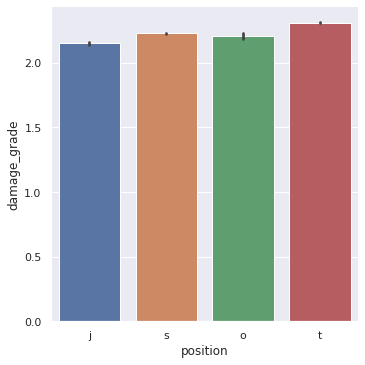

In [ ]:
chart=sns.catplot(data=df, y='damage_grade',x='position',kind='bar')

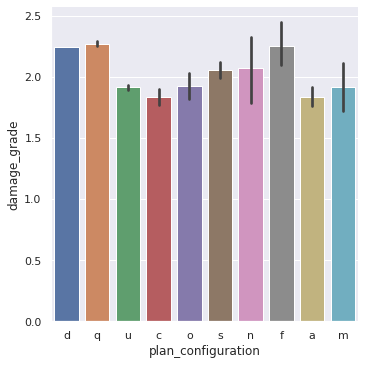

In [ ]:
chart=sns.catplot(data=df, yD='damage_grade',x='plan_configuration',kind='bar')

# visualization 2



building_id                 1020144
geo_level_1_id                   10
geo_level_2_id                  804
geo_level_3_id                 1371
count_floors_pre_eq               2
                             ...   
plan_configuration_u              0
legal_ownership_status_a          0
legal_ownership_status_r          0
legal_ownership_status_v          1
legal_ownership_status_w          0
Name: 0, Length: 70, dtype: int64
Correlation between has_superstructure_mud_mortar_stone and damage_grade: 0.2918553596383097
Correlation between has_superstructure_cement_mortar_brick and damage_grade: -0.254455344781997
Correlation between foundation_type_i and damage_grade: -0.2652633854290996
Correlation between foundation_type_r and damage_grade: 0.3435073802821486
Correlation between roof_type_x and damage_grade: -0.2798893049208171
Correlation between ground_floor_type_f and damage_grade: 0.23547729052398966
Correlation between ground_floor_type_v and damage_grade: -0.3196433878063977
Corr

[Text(0, 0, 'ground_floor_type_v'),
 Text(0, 0, 'roof_type_x'),
 Text(0, 0, 'foundation_type_i'),
 Text(0, 0, 'has_superstructure_cement_mortar_brick'),
 Text(0, 0, 'other_floor_type_s'),
 Text(0, 0, 'ground_floor_type_f'),
 Text(0, 0, 'has_superstructure_mud_mortar_stone'),
 Text(0, 0, 'foundation_type_r')]

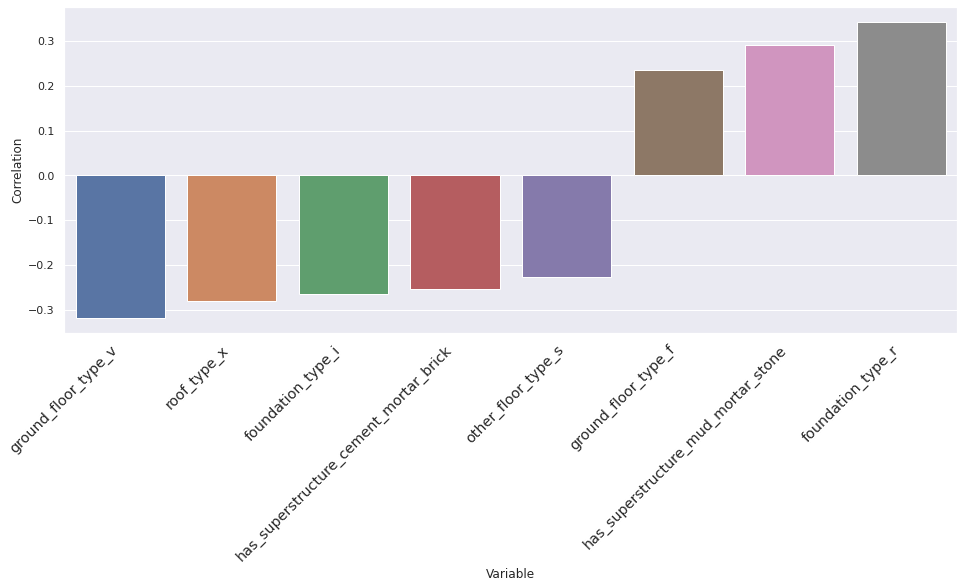

In [ ]:
df_onehot = pd.get_dummies(data=df, columns=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'])

r = df_onehot.corr()

dat = pd.DataFrame()

for column in list(df_onehot.columns):
  correlation = r[column]['damage_grade']
  if ((correlation > 0.2 or correlation < -0.2) and column != 'damage_grade'):
    print("Correlation between", column, "and damage_grade:", correlation)
    dat_new = pd.DataFrame([[column, correlation]], columns=['Variable', 'Correlation'])
    dat = dat.append(dat_new)

dat = dat.sort_values('Correlation')
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Variable", y="Correlation", data=dat,)
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)

In [ ]:
df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [ ]:
sns.displot(df, x="damage_grade", hue="ground_floor_type", bins=[1, 2, 3, 3.9], multiple="stack")

variables = ['f','v']

df_edit = df[df.ground_floor_type.isin(variables)]
with sns.color_palette("husl", 8):
  sns.displot(df_edit, x="damage_grade", hue="ground_floor_type", bins=[1, 2, 3, 3.9], multiple="stack")
  y = sns.displot(df_edit, x="damage_grade", hue="ground_floor_type", bins=[1, 2, 3, 3.9], multiple="stack")
  y.set(yscale="log")

In [ ]:
print(df['count_floors_pre_eq'].max())

sns.displot(df, x="count_floors_pre_eq", bins=[1, 2, 3, 4,5,6,7,8,9])
y = sns.displot(df, x="count_floors_pre_eq", bins=[1, 2, 3, 4,5,6,7,8,9])
y.set(yscale="log")

df2 = df.iloc[:,-12:-1]
df2['has_secondary_use'] = 1 - df2['has_secondary_use']


df2.idxmax(axis=1)
df['uses'] = df2.idxmax(axis=1)



In [ ]:
variables = ['has_secondary_use']
df_new = df[~df.uses.isin(variables)]
with sns.color_palette("husl", 8):
  sns.displot(df_new, x="count_floors_pre_eq", hue="uses", bins=[1, 2, 3, 4,5,6,7,8,9], multiple="stack")
  sns.displot(df_new, x="count_floors_pre_eq", hue="uses", bins=[3, 4,5,6,7,8,9], multiple="stack")

In [ ]:

df_floor_corr = df[df.count_floors_pre_eq > 2]
print(df_floor_corr.shape[0])
df_onehot2 = pd.get_dummies(data=df_floor_corr, columns=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'])
r = df_onehot2.corr()

dat1 = pd.DataFrame(columns = ['Variable', 'Correlation'])

for column in list(df_onehot2.columns):
  correlation = r[column]['damage_grade']
  if ((correlation > 0.2 or correlation < -0.2) and column != 'damage_grade'):
    print("Correlation between", column, "and damage_grade:", correlation)
    dat2 = pd.DataFrame([[column, correlation]], columns=['Variable', 'Correlation'])
    dat1 = dat1.append(dat2)

dat1 = dat1.sort_values('Correlation')

with sns.color_palette("mako", 5):
  plt.figure(figsize=(16, 6))
  ax = sns.barplot(x="Variable", y="Correlation", data=dat1,)
  ax.set_xticklabels(
      ax.get_xticklabels(), 
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='large'

)

In [ ]:
df_floor_corr = df[df.count_floors_pre_eq < 3]
print(df_floor_corr.shape[0])
df_onehot2 = pd.get_dummies(data=df_floor_corr, columns=['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status'])
r = df_onehot2.corr()

dat1 = pd.DataFrame(columns = ['Variable', 'Correlation'])

for column in list(df_onehot2.columns):
  correlation = r[column]['damage_grade']
  if ((correlation > 0.2 or correlation < -0.2) and column != 'damage_grade'):
    print("Correlation between", column, "and damage_grade:", correlation)
    dat2 = pd.DataFrame([[column, correlation]], columns=['Variable', 'Correlation'])
    dat1 = dat1.append(dat2)

dat1 = dat1.sort_values('Correlation')

with sns.color_palette("mako", 5):
  plt.figure(figsize=(12, 6))
  ax = sns.barplot(x="Variable", y="Correlation", data=dat1,)
  ax.set_xticklabels(
      ax.get_xticklabels(), 
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='large'

)

In [ ]:
df_cleaned = df[df.age < 600]
plt.figure(figsize=(20, 20))
sns.relplot(x="age", y="height_percentage", hue="damage_grade", data=df_cleaned)

# visualization 3